Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2022/2023  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Prva laboratorijska vježba: Linearna regresija

*Verzija: 1.0
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2022 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **23. listopada 2022. u 23:59h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od sedam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [73]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


c:\Users\KATARINA\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['matmul', 'poly', 'degrees', 'clf', 'axes']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [74]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [75]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=1)
Fi_matrix = poly.fit_transform(X)
print(Fi_matrix)

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 4.]]


### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [76]:
from tkinter import Y
from numpy import linalg
Fi_matrix_T = np.transpose(Fi_matrix)
W1 = np.matmul(np.matmul(linalg.inv(np.matmul(Fi_matrix_T, Fi_matrix)), Fi_matrix_T), y)
print(W1)
W2 = np.matmul(linalg.pinv(Fi_matrix), y)
print(W2)

[2.2        0.45714286]
[2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

In [77]:
from tkinter import W
from sklearn.metrics import mean_squared_error

estimated_values = []
print("D(x,y) | h(x~)")
for i in range(X.shape[0]):
    h = np.dot(Fi_matrix[i],np.transpose(W1))
    estimated_values.append(h)
    print(f'({X[i][0]}, {y[i]}) | ({X[i][0]}, {h})')
err = mean_squared_error(y, estimated_values)
print(err)


D(x,y) | h(x~)
(0, 4) | (0, 2.2)
(1, 1) | (1, 2.6571428571428575)
(2, 2) | (2, 3.1142857142857143)
(4, 5) | (4, 4.0285714285714285)
2.042857142857143


### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [78]:
try:
    inv_fi = linalg.inv(Fi_matrix)
    w_try = np.matmul(inv_fi, y)
except Exception as e:
    print(e)

Last 2 dimensions of the array must be square


### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [79]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(Fi_matrix, y)
print(reg.coef_)
print(reg.intercept_)
#reg.coef_[0] = reg.coef_[0] + reg.intercept_
#print(reg.coef_)

[0.         0.45714286]
2.2


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [80]:
from numpy.random import normal
def make_labels(X, f, noise=0):
    lables=[]
    no_noise = []
    for i in range (X.shape[0]):
        noise_val = np.random.normal(0, noise)
        lables.append((5+X[i][0] - 2*pow(X[i][0],2) - 5*pow(X[i][0],3)) + noise_val)
        no_noise.append((5+X[i][0] - 2*pow(X[i][0],2) - 5*pow(X[i][0],3)))
    return lables, no_noise

In [81]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

In [82]:
instances = make_instances(-5,5,50)
lables, no_noise = make_labels(instances, f=0, noise=200)


Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

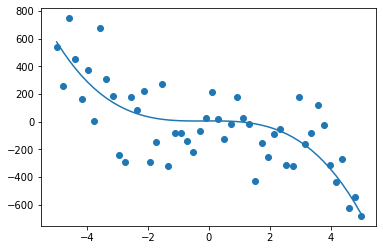

In [83]:
from cProfile import label

plt.plot(instances, no_noise)
plt.scatter(instances, lables)

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

In [84]:
poly2 = PolynomialFeatures(degree=3)
Fi_matrix2 = poly2.fit_transform(instances)
reg2 = LinearRegression().fit(Fi_matrix2, lables)
reg2.coef_[0] = reg2.coef_[0] + reg2.intercept_

estimated_values2 = []
#prvo rijesi w sa zbrajanjem pa onda ovo
for i in range(instances.shape[0]):
    h = np.dot(Fi_matrix2[i],np.transpose(reg2.coef_))
    estimated_values2.append(h)
err2 = mean_squared_error(lables, estimated_values2)
print(err2)


37889.154776662595


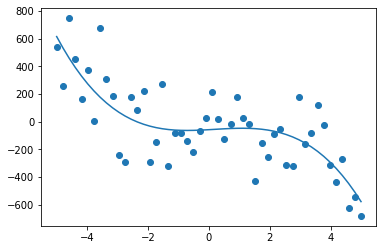

In [85]:
plt.plot(instances, estimated_values2)
plt.scatter(instances, lables)

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

Error for degree=1 is 49564.36051089393.
Error for degree=3 is 37889.154776662595.
Error for degree=5 is 36993.076074269266.
Error for degree=10 is 32381.519299321248.
Error for degree=20 is 22633.081426752717.


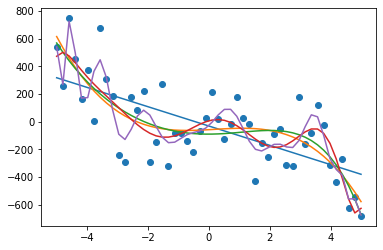

In [86]:
d = [1,3,5,10,20]
plt.scatter(instances, lables)
for deg in d:
    poly3 = PolynomialFeatures(deg)
    Fi_matrix3 = poly3.fit_transform(instances)
    reg3 = LinearRegression().fit(Fi_matrix3, lables)
    reg3.coef_[0] = reg3.coef_[0] + reg3.intercept_

    estimated_values3 = []
    for i in range(instances.shape[0]):
        h = np.dot(Fi_matrix3[i],np.transpose(reg3.coef_))
        estimated_values3.append(h)
    err3 = mean_squared_error(lables, estimated_values3)
    plt.plot(instances, estimated_values3)
    print(f'Error for degree={deg} is {err3}.')


### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih dvadeset modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

In [112]:
from operator import matmul


def calculateLinearRegError(deg, X_train, X_test, y_train, y_test):
    poly = PolynomialFeatures(deg)
    Fi_matrix = poly.fit_transform(X_train)
    reg = LinearRegression().fit(Fi_matrix, y_train)
    reg.coef_[0] = reg.coef_[0] + reg.intercept_

    estimated_values = []
    #for i in range(X_train.shape[0]):
        #h = np.dot(Fi_matrix[i],np.transpose(reg.coef_))
        #estimated_values.append(h)

    estimated_values = matmul(Fi_matrix, reg.coef_)
    err_train = np.log(mean_squared_error(y_train, estimated_values))

    Fi_matrix_test= poly.fit_transform(X_test)
    predicted_y = reg.predict(Fi_matrix_test)
    err_test = np.log(mean_squared_error(y_test, predicted_y))

    return err_train, err_test

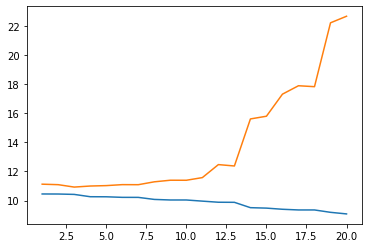

In [128]:
from sklearn.model_selection import train_test_split

#def error_graph(instances, lables):
error_train = []
error_test = []
X_train3b, X_test3b, y_train3b, y_test3b = train_test_split(instances, lables, test_size=0.5)

degr = list(range(1,21,1))
for deg in degr:
    e_tr, e_ts = calculateLinearRegError(deg, X_train3b, X_test3b, y_train3b, y_test3b)
    error_train.append(e_tr)
    error_test.append(e_ts)
plt.plot(degr, error_train)
plt.plot(degr, error_test)

#error_graph(instances = instances, lables = lables)
    



### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

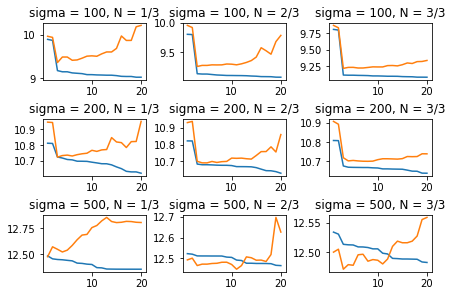

In [89]:
N_examples = make_instances(-5,5,1000)
X_500test, X_500train = train_test_split(N_examples, test_size=0.5)

nr_graf = 1
sigma = [100, 200, 500]
degr = list(range(1,21,1))
#plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=None, hspace=None)

fig, axes = plt.subplots(3,3, constrained_layout=True)

for sig in sigma:
    Y_500train, n_n = make_labels (X_500train, 0, sig)
    Y_500test, n_n2 = make_labels (X_500test, 0, sig)
    for j in range(1,4,1):
        list_error_train = []
        list_error_test = []
        X_train3c = X_500train[:j*166]
        X_test3c = X_500test[:j*166]
        y_train3c = Y_500train[:j*166]
        y_test3c = Y_500test[:j*166]
        for d in degr:
            e_tr, e_ts = calculateLinearRegError(d, X_train3c, X_test3c, y_train3c, y_test3c)
            list_error_train.append(e_tr)
            list_error_test.append(e_ts)
        plt.subplot(3,3,nr_graf)
        nr_graf+=1
        plt.plot(degr, list_error_train)
        plt.plot(degr, list_error_test)
        plt.title(f'sigma = {sig}, N = {j}/3')



***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [90]:
poly = PolynomialFeatures(degree=3)
Fi_matrix4a = poly.fit_transform(X)
Fi_matrix4a_T = np.transpose(Fi_matrix4a)
lambda_val = [0,1,10]
for l in lambda_val:
    lambda_identity = np.dot(l,np.identity(4))
    lambda_identity[0][0]=0
    W_4a = linalg.inv((np.matmul(Fi_matrix4a_T, Fi_matrix4a)+lambda_identity))
    W_4a = np.matmul(np.matmul(W_4a, Fi_matrix4a_T), y)
    print(W_4a)


[ 4.         -5.91666667  3.375      -0.45833333]
[ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
[ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [91]:
from sklearn.linear_model import Ridge
for l in lambda_val:
    clf = Ridge(l)
    clf.fit(Fi_matrix4a, y)
    print(clf.coef_)
    print(clf.intercept_)

[ 0.         -5.91666667  3.375      -0.45833333]
4.000000000000021
[ 0.         -0.69079365 -0.2831746   0.1445805 ]
3.0569614512471652
[ 0.         -0.15897295 -0.13423067  0.0815601 ]
2.4944418431229725


### (c)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

In [92]:
def ridge_h_Calculate (deg, lambda_val, X_train, y_train):
    poly4 = PolynomialFeatures(deg)
    Fi_matrix4 = poly4.fit_transform(X_train)
    clf4  = Ridge(lambda_val)
    clf4.fit(Fi_matrix4, y_train)
    clf4.coef_[0] = clf4.coef_[0] + clf4.intercept_
    H=[]
    for i in range(X_train.shape[0]):
        h = np.dot(Fi_matrix4[i],np.transpose(clf4.coef_))
        H.append(h)
    plt.plot(X_train, H)

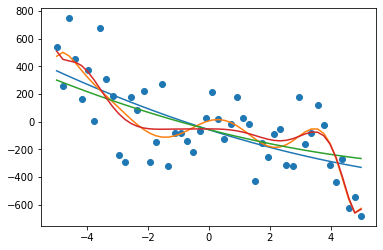

In [93]:
lambda_val = [0,100]
degrees = [2,10]
plt.scatter(instances, lables)
for l in lambda_val:
    for d in degrees:
        ridge_h_Calculate (d, l, instances, lables)


### (d)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


In [94]:
def ridge_err_Calc(lambda_v, X_train, X_test, y_train, y_test, Fi_matrix4d, poly4d):
    clf4  = Ridge(lambda_v)
    clf4.fit(Fi_matrix4d, y_train)
    clf4.coef_[0] = clf4.coef_[0] + clf4.intercept_

    estimated_y = matmul(Fi_matrix4d, np.transpose(clf4.coef_))
    err_train = np.log(mean_squared_error(y_train, estimated_y))

    Fi_matrix_test = poly4d.fit_transform(X_test)
    pred_y = clf4.predict(Fi_matrix_test)
    err_test = np.log(mean_squared_error(y_test, pred_y))
    return err_train, err_test

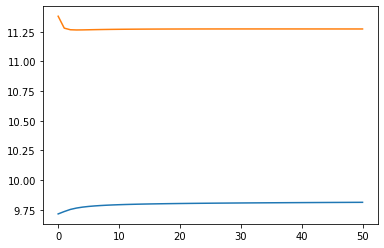

In [95]:
degree = 10
lambda_val_4d = list(range(0,51,1))
X_train, X_test, y_train, y_test = train_test_split(instances, lables, test_size=0.5)

poly4d = PolynomialFeatures(10)
Fi_matrix4d = poly4d.fit_transform(X_train)

err_tr = []
err_ts = []
for l in lambda_val_4d:
    e_tr, e_ts = ridge_err_Calc(l, X_train, X_test, y_train, y_test, Fi_matrix4d, poly4d)
    err_tr.append(e_tr)
    err_ts.append(e_ts)
plt.plot(lambda_val_4d, err_tr)
plt.plot(lambda_val_4d, err_ts)



### 5. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [96]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

In [97]:
def norm_Calculate (l, Fi_matrix5a, y_train3b):
    clf5a = Ridge(l)
    clf5a.fit(Fi_matrix5a, y_train3b)
    clf5a.coef_[0] = clf5a.coef_[0] + clf5a.intercept_
    # for w in clf5a.coef_:
    #     if w==0.0:
    #         l0+=1
    l0=nonzeroes(clf5a.coef_)
    l1=linalg.norm(clf5a.coef_, ord=1)
    l2=linalg.norm(clf5a.coef_)
    return l0,l1,l2




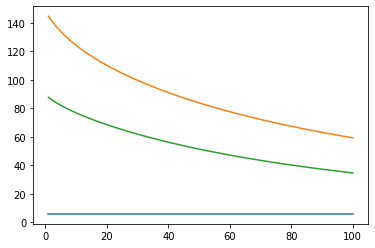

In [129]:
from sklearn.linear_model import Ridge

L_0 = []
L_1 = []
L_2 = []

lambda_val_5a = list(range(1,101,1))

poly5a = PolynomialFeatures(degree=5)
Fi_matrix5a = poly5a.fit_transform(X_train3b)

for l in lambda_val_5a:
    l0, l1, l2 = norm_Calculate(l, Fi_matrix5a, y_train3b)
    L_0.append(l0)
    L_1.append(l1)
    L_2.append(l2)

plt.plot(lambda_val_5a, L_0)
plt.plot(lambda_val_5a, L_1)
plt.plot(lambda_val_5a, L_2)

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

In [99]:
from sklearn.linear_model import Lasso

def norm_CalculateL1(l, Fi_matrix5b, y_train3b):
    clf5b = Lasso(l)
    clf5b.fit(Fi_matrix5b, y_train3b)
    clf5b.coef_[0] = clf5b.coef_[0] + clf5b.intercept_
    # for w in clf5a.coef_:
    #     if w==0.0:
    #         l0+=1
    l0=nonzeroes(clf5b.coef_)
    l1=linalg.norm(clf5b.coef_, ord=1)
    l2=linalg.norm(clf5b.coef_)
    return l0,l1,l2

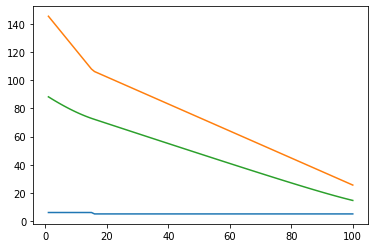

In [130]:
L_0 = []
L_1 = []
L_2 = []

lambda_val_5b = list(range(1,101,1))

poly5b = PolynomialFeatures(degree=5)
Fi_matrix5b = poly5b.fit_transform(X_train3b)

for l in lambda_val_5b:
    l0, l1, l2 = norm_CalculateL1(l, Fi_matrix5b, y_train3b)
    L_0.append(l0)
    L_1.append(l1)
    L_2.append(l2)

plt.plot(lambda_val_5a, L_0)
plt.plot(lambda_val_5a, L_1)
plt.plot(lambda_val_5a, L_2)

### 6. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [101]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

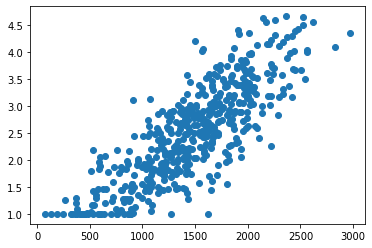

In [102]:
plt.scatter(exam_score, grades_y)

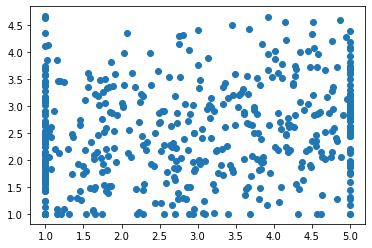

In [103]:
plt.scatter(grade_in_highschool, grades_y)

### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

[0.00141497 0.09477276]
0.15061179575775974


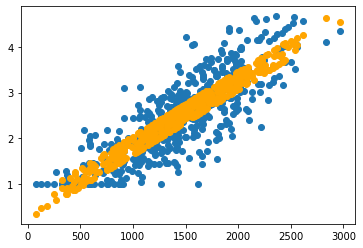

In [104]:
clf6b = Ridge(0.01)
clf6b.fit(grades_X, grades_y)
print(clf6b.coef_)
print(clf6b.intercept_)

predict_y_grades = clf6b.predict(grades_X)

plt.scatter(exam_score, grades_y)
plt.scatter(exam_score, predict_y_grades, color='orange')


Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [105]:
from sklearn.preprocessing import StandardScaler

scaler_x = StandardScaler()
scaler_y = StandardScaler()

grades_X_fixed = scaler_x.fit_transform(grades_X)
grades_y_fixed = scaler_y.fit_transform(grades_y.reshape(-1,1))

clf6b.fit(grades_X_fixed, grades_y_fixed)

print(clf6b.coef_)
print(clf6b.intercept_)

[[0.81630375 0.15167761]]
[8.62551331e-17]


**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 7. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [106]:
grades_X_fixed_colinear = np.hstack((grades_X_fixed, np.tile(grades_X_fixed[:, [-1]], 1)))
#print(grades_X_fixed_colinear)

Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [107]:
clf7a = Ridge(0.01)
clf7a.fit(grades_X_fixed_colinear, grades_y_fixed)
print(clf7a.coef_)
print(clf7a.intercept_)

predict_y_grades = clf7a.predict(grades_X_fixed_colinear)



[[0.81630364 0.07583957 0.07583957]]
[8.6255971e-17]


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [108]:
from statistics import stdev

lambda_1 = 0.01
lambda_2 = 1000

l1_w0 = []
l1_w1 = []
l1_w2 = []

l2_w0 = []
l2_w1 = []
l2_w2 = []

for i in range (10):
    X1, X2, y1, y2 = train_test_split(grades_X_fixed_colinear, grades_y_fixed, test_size=0.5)
    clf7b1 = Ridge(lambda_1)
    clf7b2 = Ridge(lambda_2)

    clf7b1.fit(X1, y1)
    clf7b2.fit(X1, y1)

    l1_w0.append(clf7b1.coef_[0][0])
    l1_w1.append(clf7b1.coef_[0][1])
    l1_w2.append(clf7b1.coef_[0][2])

    l2_w0.append(clf7b1.coef_[0][0])
    l2_w1.append(clf7b1.coef_[0][1])
    l2_w2.append(clf7b1.coef_[0][2])

    print(f'n={i+1} lambda1_coef {clf7b1.coef_}')
    print(f'n={i+1} lambda2_coef {clf7b2.coef_}')
print()

print(stdev(l1_w0))
print(stdev(l1_w1))
print(stdev(l1_w2))
print(stdev(l2_w0))
print(stdev(l2_w1))
print(stdev(l2_w2))



n=1 lambda1_coef [[0.79385128 0.06504303 0.06504303]]
n=1 lambda2_coef [[0.16436364 0.03812874 0.03812874]]
n=2 lambda1_coef [[0.80739011 0.0761075  0.0761075 ]]
n=2 lambda2_coef [[0.15992321 0.02415424 0.02415424]]
n=3 lambda1_coef [[0.814158   0.07673386 0.07673386]]
n=3 lambda2_coef [[0.16128257 0.02717137 0.02717137]]
n=4 lambda1_coef [[0.83265053 0.07483515 0.07483515]]
n=4 lambda2_coef [[0.16579999 0.03405283 0.03405283]]
n=5 lambda1_coef [[0.79735626 0.08013669 0.08013669]]
n=5 lambda2_coef [[0.15703356 0.02664742 0.02664742]]
n=6 lambda1_coef [[0.81845427 0.04525193 0.04525193]]
n=6 lambda2_coef [[0.17833349 0.03188297 0.03188297]]
n=7 lambda1_coef [[0.80086373 0.0614553  0.0614553 ]]
n=7 lambda2_coef [[0.15563723 0.022474   0.022474  ]]
n=8 lambda1_coef [[0.81216485 0.06648337 0.06648337]]
n=8 lambda2_coef [[0.16174675 0.03077003 0.03077003]]
n=9 lambda1_coef [[0.81501911 0.04444567 0.04444567]]
n=9 lambda2_coef [[0.16591703 0.01772788 0.01772788]]
n=10 lambda1_coef [[0.819259

**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.